In [1]:
from acquire_msc import get_all_readme_files_and_languages
from prepare_readme_files import prepare_repo_html_data

import re
import unicodedata
import pandas as pd
import nltk
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from afinn import Afinn

In [2]:
url_list = ['microsoft/Terminal', 'jackfrued/Python-100-Days', 
    'kkuchta/css-only-chat', 'microsoft/PowerToys', 'jolaleye/cssfx', 
    'MisterBooo/LeetCodeAnimation', 'flutter/flutter_web', 
    'TheAlgorithms/Python', 'hiroppy/fusuma', 'CyC2018/CS-Notes', 
    'jaywcjlove/linux-command', 'flutter/flutter', '996icu/996.ICU', 
    'STVIR/pysot', 'minamarkham/formation', 'azl397985856/leetcode', 
    'qianguyihao/Web', 'react-native-windows', 'sql-machine-learning/sqlflow', 
    'sabakkps/backslide', 'dgryski/go-perfbook', 'Snailclimb/JavaGuide', 
    'microsoft/vscode', 'markphelps/flipt', 'teoga/awesome-product-design']
afinn = Afinn()

In [3]:
'''create a list of extra words and another of words to exclude from the stoplist'''
extra_words = []
exclude_words = []

articles = get_all_readme_files_and_languages(url_list)
print(articles[0]['language'])
print(articles[0].keys())
transformed_data, df = prepare_repo_html_data(articles, extra_words, exclude_words)

C++
dict_keys(['title', 'language', 'content'])


In [4]:
languages = []
for i in range(df.shape[0]):
    next_lang = transformed_data[i]['language']
    if next_lang not in languages:
        languages.append(next_lang)

In [5]:
languages

['C++',
 'HTML',
 'Ruby',
 'Vue',
 'Dart',
 'Python',
 'CSS',
 'Java',
 'Rust',
 'Go',
 'TypeScript']

In [6]:
df

,category,clean,language,title
0,repo_readme,welcome repository contains source code window...,C++,microsoft/Terminal
1,repo_readme,python 100 python python c c python python jav...,HTML,jackfrued/Python-100-Days
2,repo_readme,css chat truly monstrous async web chat using ...,Ruby,kkuchta/css-only-chat
3,repo_readme,overview powertoys set utilities power users t...,Ruby,microsoft/PowerToys
4,repo_readme,beautifully simple click copy css effects http...,Vue,jolaleye/cssfx
5,repo_readme,english version readme click leetcode 3 4 0 1 ...,Vue,MisterBooo/LeetCodeAnimation
6,repo_readme,welcome code repository flutter web repository...,Dart,flutter/flutter_web
7,repo_readme,algorithms python algorithms implemented pytho...,Python,TheAlgorithms/Python
8,repo_readme,make slides markdown easily write markdown cre...,CSS,hiroppy/fusuma
9,repo_readme,java offer leetcode linux http socket sql leet...,Java,CyC2018/CS-Notes


In [7]:
all_words = df.iloc[0]['clean'].split(' ')

In [8]:
all_freq = pd.Series(all_words).value_counts()
top_20 = all_freq.head(20)

In [9]:
top_20.index

Index(['windows', 'terminal', 'console', 'code', 'build', 'line', 'new',
       'command', 'exe', 'need', 'building', 'repository', 'please', 'make',
       'sure', 'running', 'work', 'host', 'several', 'would'],
      dtype='object')

There are no language words in the readme files.

In [10]:
for word in all_freq.index:
    if word in languages:
        print(word)

(-0.5, 799.5, 399.5, -0.5)

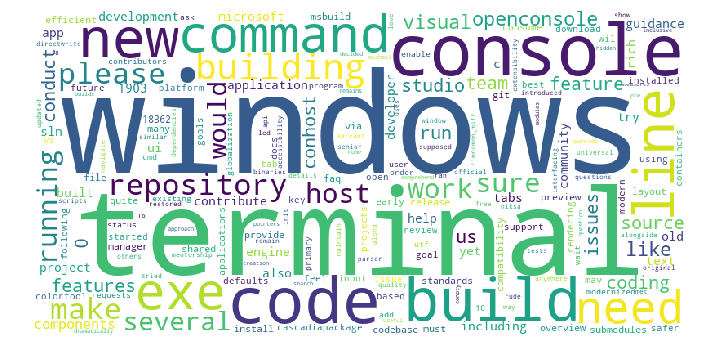

In [11]:
cloud = WordCloud(background_color='white', width=800, height=400)
all_img = cloud.generate_from_frequencies(all_freq)
plt.figure(figsize=(20, 6))
plt.imshow(all_img)
plt.axis('off')

In [13]:
df.head()

,category,clean,language,title
0,repo_readme,welcome repository contains source code window...,C++,microsoft/Terminal
1,repo_readme,python 100 python python c c python python jav...,HTML,jackfrued/Python-100-Days
2,repo_readme,css chat truly monstrous async web chat using ...,Ruby,kkuchta/css-only-chat
3,repo_readme,overview powertoys set utilities power users t...,Ruby,microsoft/PowerToys
4,repo_readme,beautifully simple click copy css effects http...,Vue,jolaleye/cssfx


In [80]:
list(total_freq['words'].values)

['ccc', 'bbb', 'aaa']

In [82]:
all_words = []
all_freq = pd.Series()
top_20 = pd.Series()
total_freq = pd.DataFrame()

all_words = ['aaa', 'bbb', 'ccc']
all_freq = pd.Series(all_words).value_counts()
total_freq['words'] = all_freq.index
total_freq['count'] = all_freq.values

for i in range(0, 3):
    all_words = ['aaa', 'bbb', 'ccc']
    all_freq = pd.Series(all_words).value_counts()

    for word in all_words:

        if word in list(total_freq['words'].values):
            total_freq['count'] += all_freq[word]
            print('sum=')
            print(total_freq['count'])


total_freq

sum=
0    2
1    2
2    2
Name: count, dtype: int64
sum=
0    3
1    3
2    3
Name: count, dtype: int64
sum=
0    4
1    4
2    4
Name: count, dtype: int64
sum=
0    5
1    5
2    5
Name: count, dtype: int64
sum=
0    6
1    6
2    6
Name: count, dtype: int64
sum=
0    7
1    7
2    7
Name: count, dtype: int64
sum=
0    8
1    8
2    8
Name: count, dtype: int64
sum=
0    9
1    9
2    9
Name: count, dtype: int64
sum=
0    10
1    10
2    10
Name: count, dtype: int64


,words,count
0,ccc,10
1,bbb,10
2,aaa,10


In [60]:
all_words = []
all_freq = pd.Series()
top_20 = pd.Series()
total_freq = pd.DataFrame()

all_words = df.iloc[0]['clean'].split(' ')
all_freq = pd.Series(all_words).value_counts()
total_freq['words'] = all_freq.index
total_freq['count'] = all_freq.values

for i in range(1, df.shape[0]):
    all_words = df.iloc[i]['clean'].split(' ')
    all_freq = pd.Series(all_words).value_counts()
    for word in all_words:
        if word in total_freq['words']:
            total_freq['count'] += all_freq[word]

total_freq

,words,count
0,windows,29
1,terminal,21
2,console,15
3,code,12
4,build,10
5,line,9
6,new,9
7,command,8
8,exe,8
9,need,8


In [29]:
word_freqs = pd.DataFrame()
# for row in range(df.shape[0]):
for row in range(5):  
    all_words_for_file = df.iloc[row]['clean'].split(' ')
    all_freq_for_file = pd.Series(all_words_for_file).value_counts()
    top_20 = all_freq_for_file.head(20)
    word_freqs[row] = top_20
#     print(all_freq)
#     print(all_freq)
#     print('\n\n\n\n\n')
word_freqs

,0,1,2,3,4
windows,29,NaN,NaN,6.0,NaN
terminal,21,NaN,NaN,NaN,NaN
console,15,NaN,NaN,NaN,NaN
code,12,NaN,NaN,3.0,1.0
build,10,NaN,NaN,NaN,NaN
line,9,NaN,NaN,NaN,NaN
new,9,NaN,NaN,4.0,NaN
command,8,NaN,NaN,NaN,NaN
exe,8,NaN,NaN,NaN,NaN
need,8,NaN,NaN,2.0,NaN


In [12]:
afinn.score('This is utterly excellent!')

3.0